In [120]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


#The dataset contains various categories, so let's begin with time series analysis and sales forecasting for the furniture category

In [122]:
df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#Data preprocessing involves tasks such as removing unnecessary columns, handling missing values, and preparing the dataset for analysis.

In [124]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 
        'Customer ID', 'Customer Name', 
        'Segment', 'Country', 'City', 'State', 
        'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [125]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

#Index time series data

In [126]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

#The current DateTime format in the dataset is somewhat complex, so I will simplify it by using the average daily sales price for each month. I will use the start of each month as the timestamp.

In [127]:
y = furniture['Sales'].resample('MS').mean()

#Visualize the furiture data

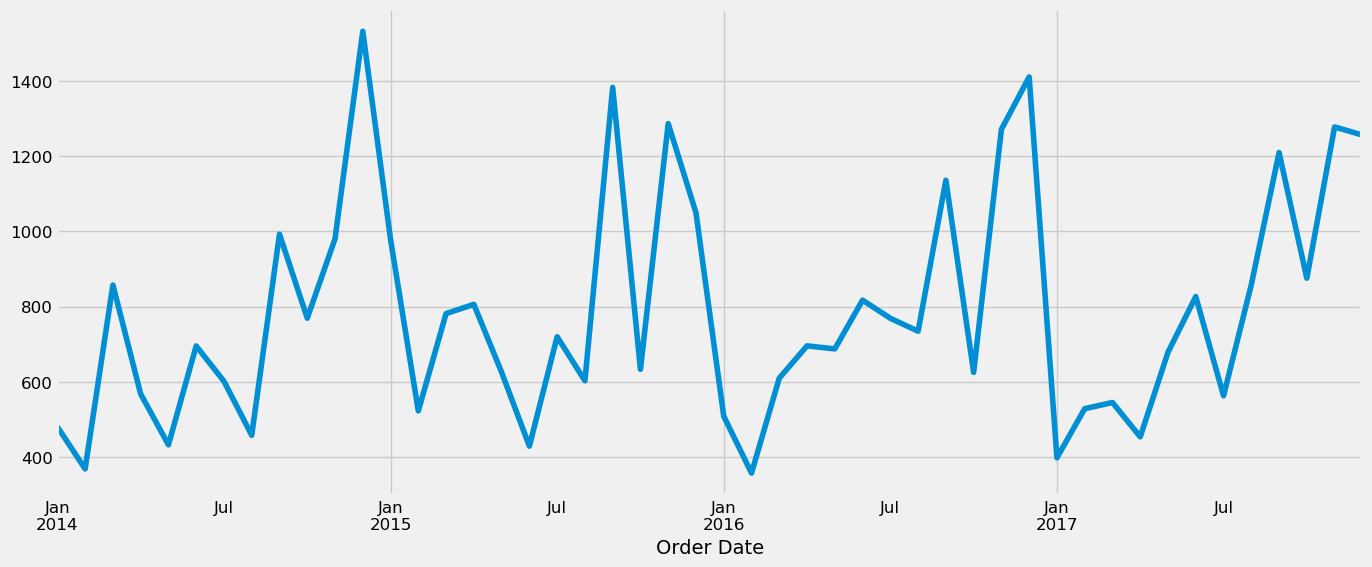

In [128]:
y.plot(figsize=(15, 6))
plt.show()

#Some patterns can be drawn from the above figure, the time series is patterned seasonally like sales are low at the beginning of every year, and sales increases at the end of the year.

#Now let’s visualize this data using the time series decomposition method which will allow our time series to decompose into three components:

Trend                                                                           
Season                                                                         
Noise

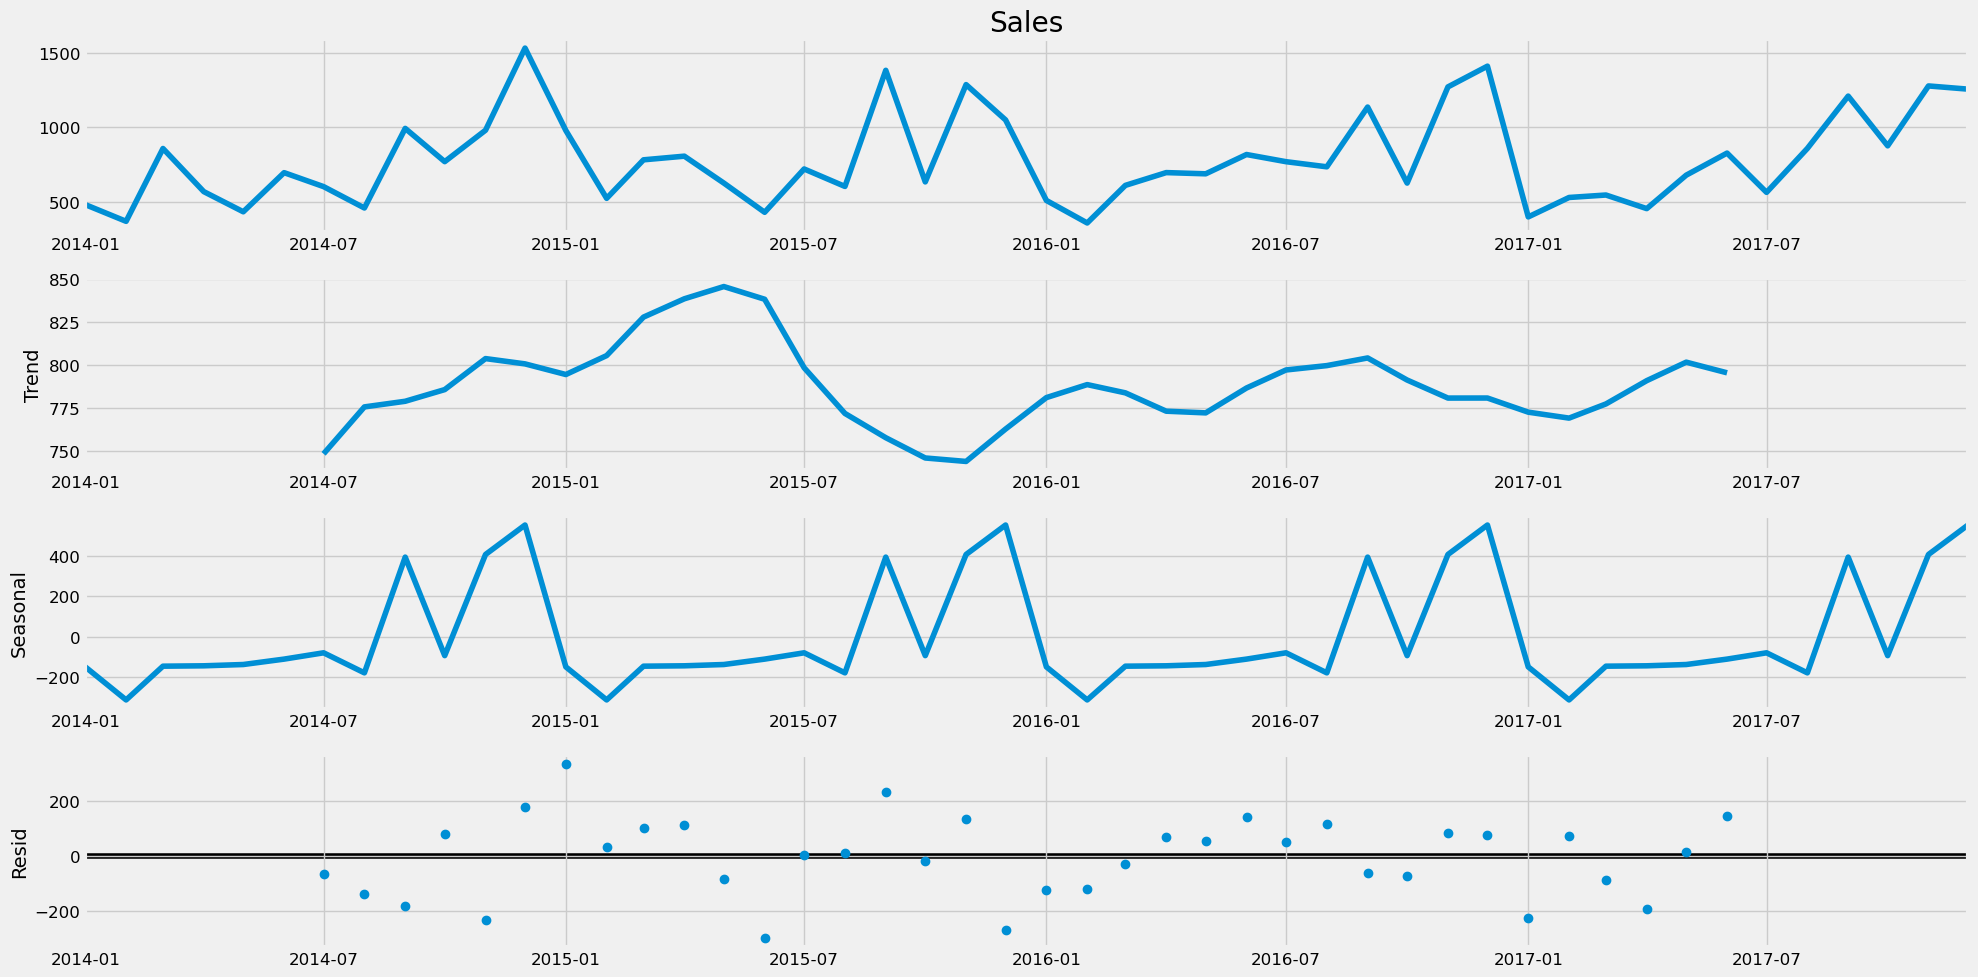

In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#The above figure indicates that furniture sales fluctuate due to seasonal variations.

# Time Series Forecasting with ARIMA

ARIMA, which stands for Autoregressive Integrated Moving Average, is one of the most widely used methods in time series forecasting. I will now apply the ARIMA method to the next steps of our time series forecasting process.

In [130]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
# Adjusting seasonal lag parameters
P = D = Q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is the process of selection of parameters in our Time Series Forecasting model for furniture sales.

In [131]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1359.2613166543165
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130918252
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793677
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1162.400200303408
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302517
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758108
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2686.290255485825
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809151
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896732967
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5754723153666
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2378.4977360755684
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468674
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576524673
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1449.7633893837328
ARIMA

# Fitting Arima model

Also run Model diagnosis; running a model diagnosis is essential in Time Series Forecasting to investigate any unusual behavior in the model.

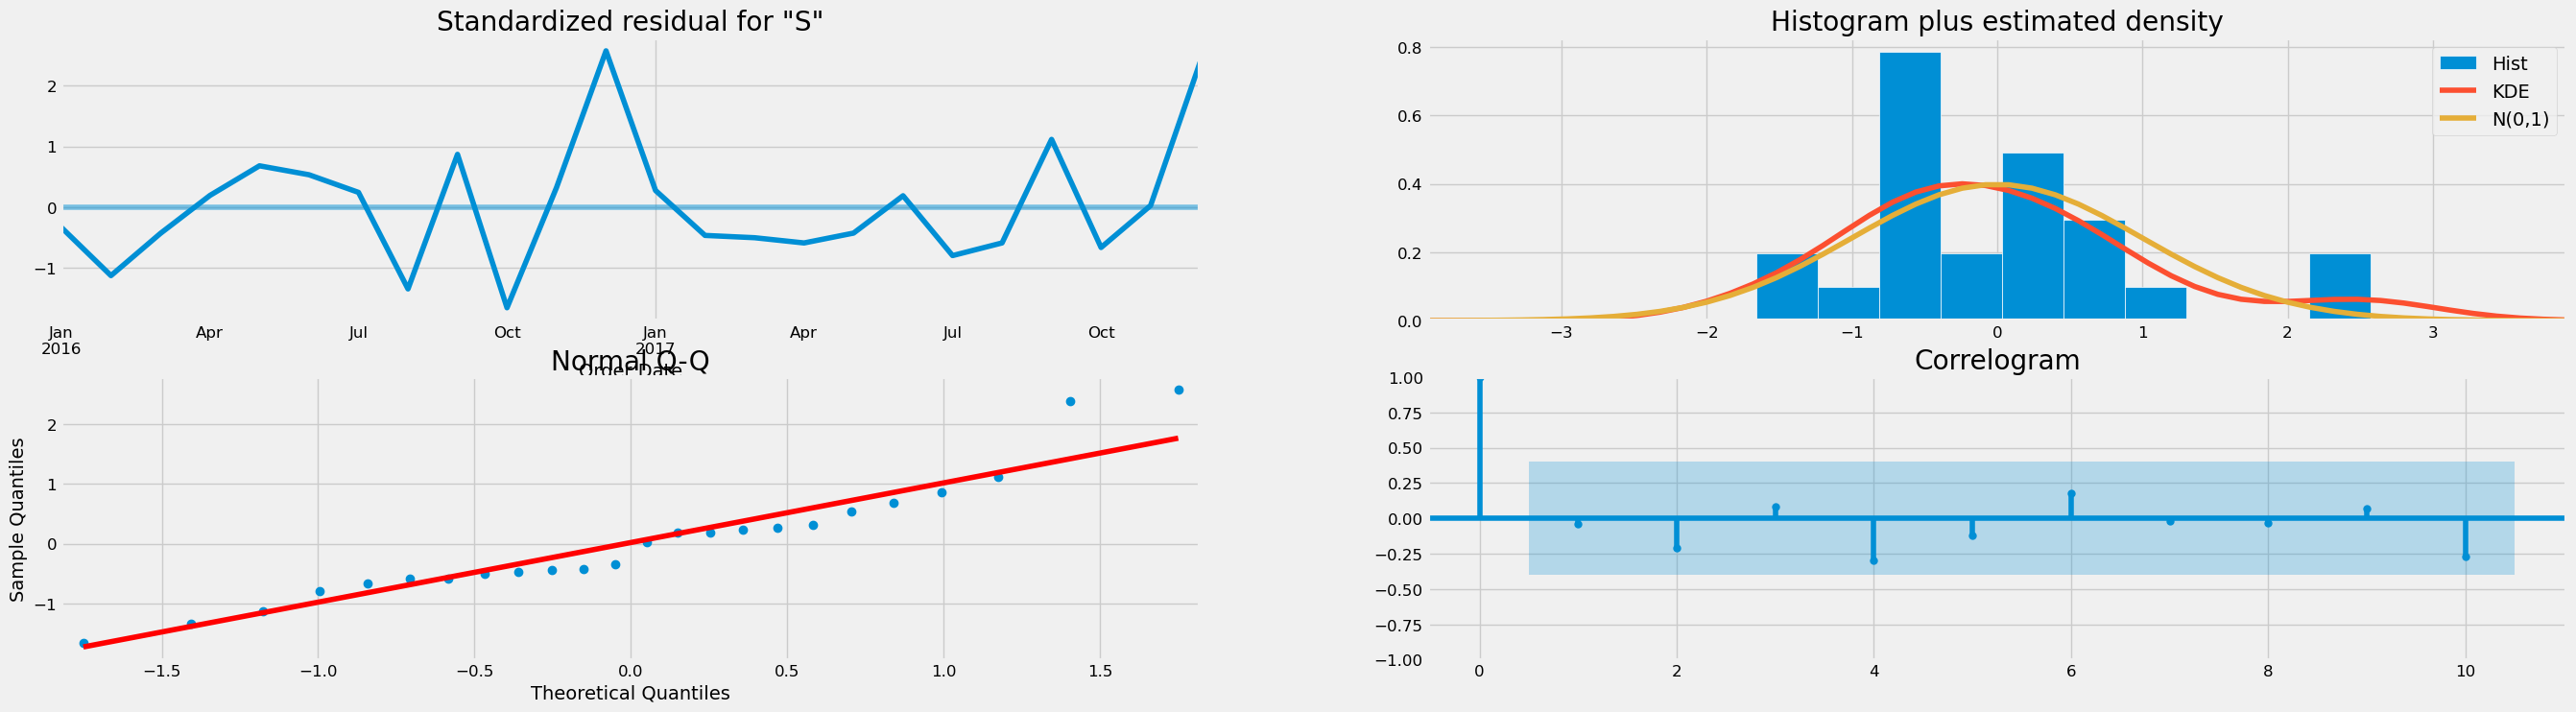

In [132]:
# Check for missing values in y
missing_values = y.isnull().sum()
if missing_values > 0:
    print("Warning: {} missing values found in the endogenous variable (y).".format(missing_values))
    # Handle missing values: Drop or interpolate
    y = y.dropna() 

# Define the SARIMA model with chosen parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 0, 11)

try:
    mod = SARIMAX(y,
                  order=order,
                  seasonal_order=seasonal_order,
                  enforce_stationarity=False,
                  enforce_invertibility=False)
    results = mod.fit()

    # Plot diagnostics
    results.plot_diagnostics(figsize=(30, 8))
    plt.show()

except ValueError as e:
    print("ValueError:", e)
except Exception as e:
    print("An error occurred:", e)
    

Validating Time Series Forecasts:-
To understand the accuracy of our time series forecasting model, I will compare predicted sales with actual sales, and I will set the forecasts to start at 2017-01-01 to the end of the dataset.

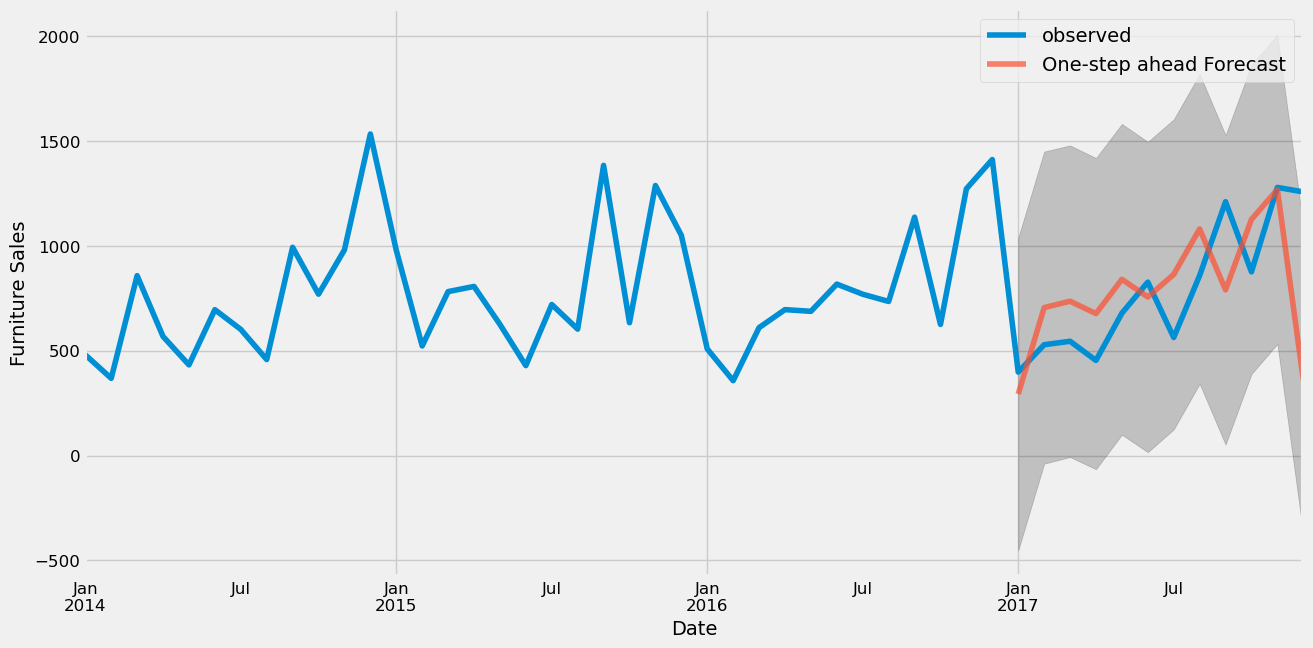

In [133]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above figure is showing the observed values in comparison with the forecast predictions. The picture is aligned with the actual sales, really well, which is showing an upward shift in the beginning and captures the seasonality at the end of the year.

In [134]:
y_forecasted = pred.predicted_mean
y_truth = y['2013-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 111643.46


In [135]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 334.13


The Root Mean Squared Error (RMSE) reveals that our model was able to predict the average daily furniture income in the test set within approximately 334.13 units of the actual income. Considering that our furniture's daily income typically ranges from around 400 to over 1200 units, an RMSE of 334.13 suggests that our forecasting version demonstrates considerable accuracy. Overall, this performance indicates a promising outcome for our forecasting model."

In [136]:
#producing and visualizing forecasts.

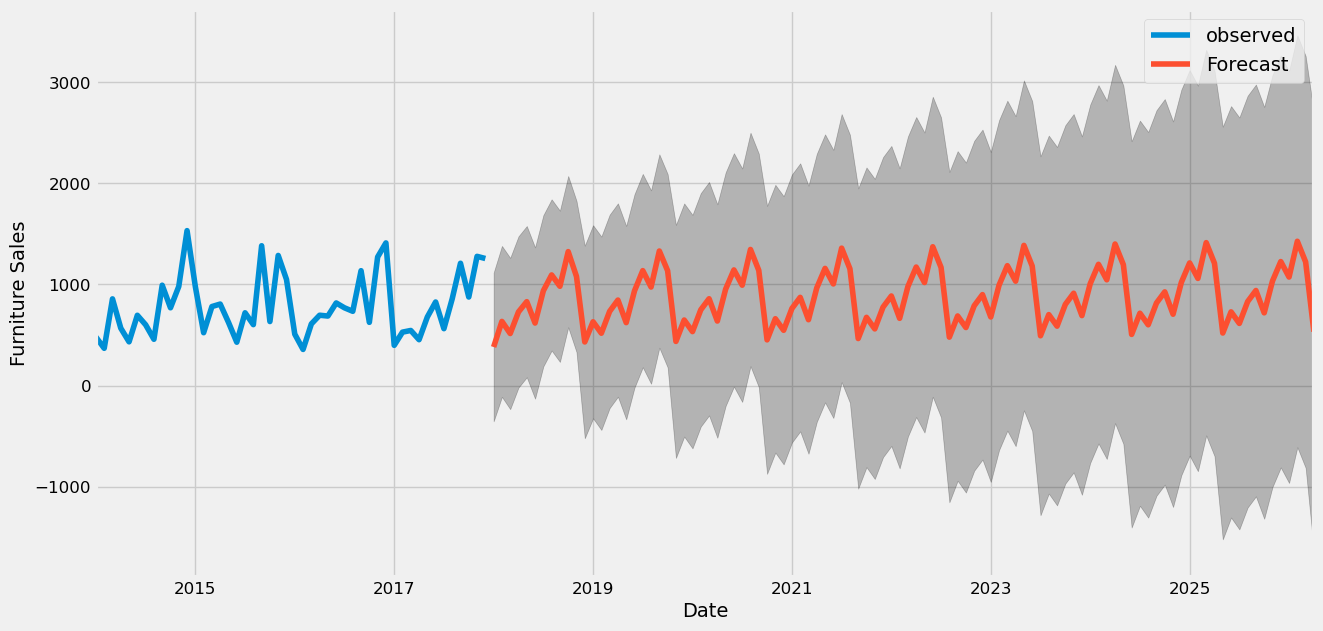

In [137]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()